# 1

Usando o Pagerank na famosa rede Zachary's Karate Club:

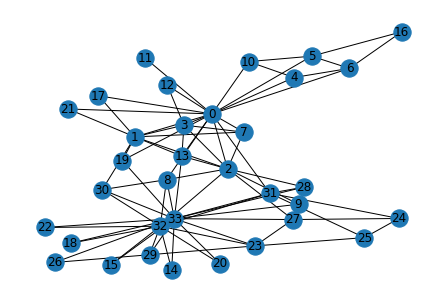

In [23]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from functions_pagerank import *

G = nx.karate_club_graph() #carregando a rede

nx.draw(G, with_labels=True)
plt.show()

Cada nó representa um membro do clube de karatê, e as arestas são presentes quando os dois indivíduos conectados também interagiam fora do clube, podemos usar medidas simples para investigar a dinâmica dessa rede:

Node Degree - Node Degree
   0     16   17      2
   1      9   18      2
   2     10   19      3
   3      6   20      2
   4      3   21      2
   5      4   22      2
   6      4   23      5
   7      4   24      3
   8      5   25      3
   9      2   26      2
  10      3   27      4
  11      1   28      3
  12      2   29      4
  13      5   30      4
  14      2   31      6
  15      2   32     12
  16      2   33     17


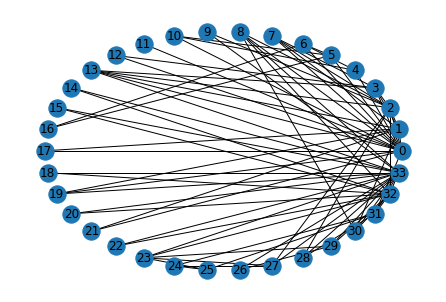

In [24]:
print("Node Degree - Node Degree")
nodes = list(G.nodes())  # Obter uma lista dos nós do grafo

for i in range(int(len(G)/2)):
    v = nodes[i]
    u = nodes[i+int(len(G)/2)]
    print(f"{v:4} {G.degree(v):6} {u:4} {G.degree(u):6}")
nx.draw_circular(G, with_labels=True)
plt.show()

Podemos ver que os nós 0,1,2,32,33 se destacam no quesito de ter o maior número de conexões, ou seja, esses são os membros do clube que participavam de mais interações fora dele, podemos ordenar esses nós pelo grau deles:

In [25]:
print("Node Degree - Node Degree")
nodes = list(G.nodes())  # Obter uma lista dos nós do grafo
nodes_degrees = [(node, G.degree(node)) for node in nodes]  # Lista de tuplas (nó, grau)

# Ordenar os nós com base no grau
sorted_nodes = sorted(nodes_degrees, key=lambda x: x[1], reverse=True)

for i in range(int(len(sorted_nodes)/2)):
    v, degree_v = sorted_nodes[i]
    u, degree_u = sorted_nodes[i+int(len(sorted_nodes)/2)]
    print(f"{v:4} {degree_v:6} {u:4} {degree_u:6}")


Node Degree - Node Degree
  33     17   10      3
   0     16   19      3
  32     12   24      3
   2     10   25      3
   1      9   28      3
   3      6    9      2
  31      6   12      2
   8      5   14      2
  13      5   15      2
  23      5   16      2
   5      4   17      2
   6      4   18      2
   7      4   20      2
  27      4   21      2
  29      4   22      2
  30      4   26      2
   4      3   11      1


In [26]:
node_labels = [node[0] for node in sorted_nodes]
print("Lista dos nós ordenada por grau:")
print(node_labels) 


Lista dos nós ordenada por grau:
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


Podemos agora usar o Pagerank para obter uma nova ordenação dos nós dessa rede:

O grafo está sendo convertido para direcionado..
Convergiu em 26 iterações.


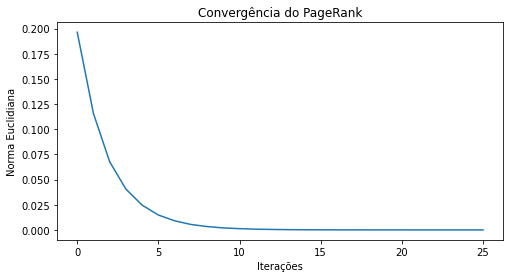

PageRank:


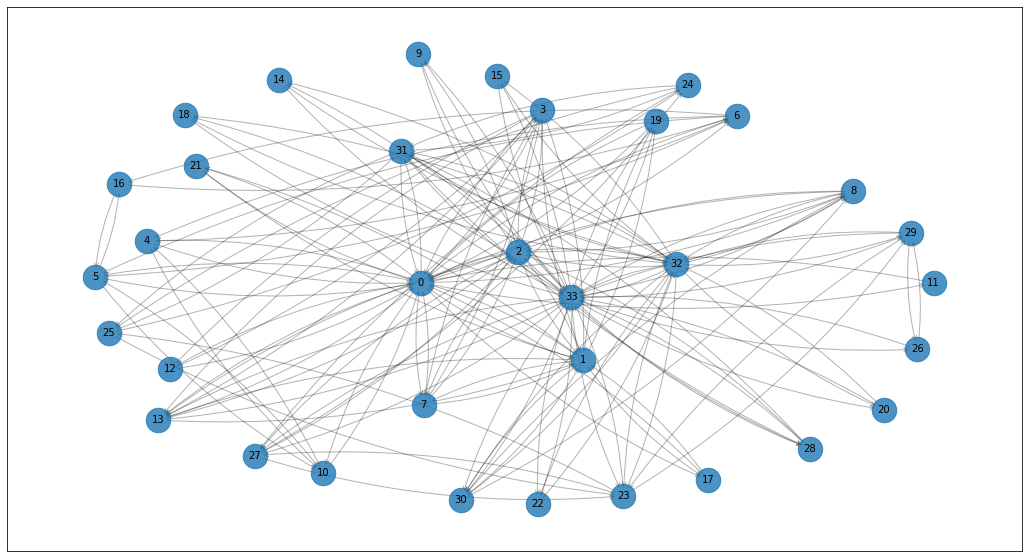

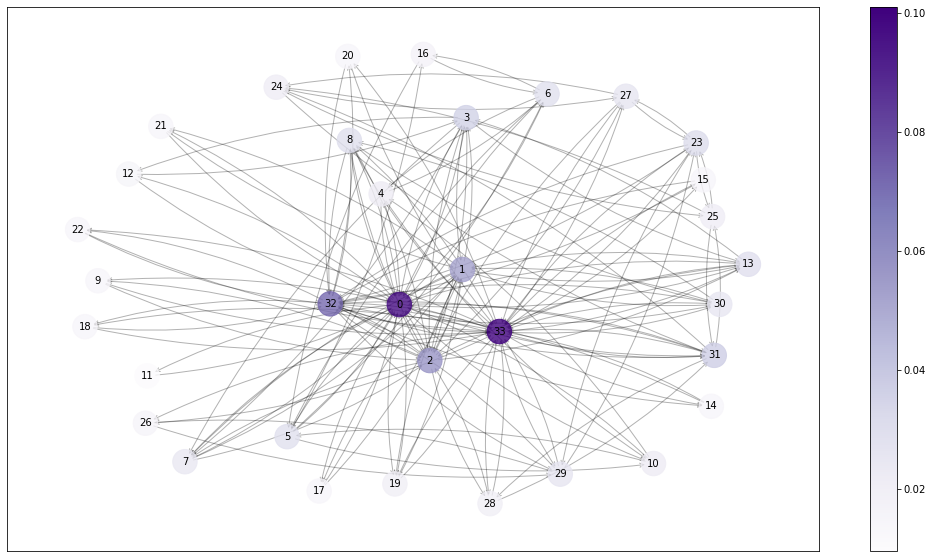

In [27]:
d=0.85
pagerank, G = run(G, d, n_iter=100)

In [28]:
# Ordenando os nós pelo pagerank:
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Obtendo apenas a lista dos nós ordenados
node_labels_pr = [node for node, rank in sorted_nodes]

# Imprimindo a lista dos nós
print("Lista dos nós ordenada pelo pagerank:")
print(node_labels_pr)

Lista dos nós ordenada pelo pagerank:
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


In [29]:
print(node_labels)
print(node_labels_pr)

[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]
[33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11]


Nesse exemplo a ordenação pelo pagerank acabou sendo idêntica a ordenação puramente pelo grau de cada nó, é esperado que os nós com maior grau acabem tendo o pagerank também maior já que o pagerank busca uma medida de importância/relevância, e ter muitaas conexões implica essas duas coisas, apesar de abordagens bem diferentes na forma de olhar o quão importante cada nó é pra rede esses dois jeitos acabaram coincindindo perfeitamente nesse caso.

# 2

Agora analisaremos o seguinte torneio de Xadrez:

In [30]:
tabela = '''
1 Tal        XXXX 0010 ==== 01=1 1111 1=11 111= 111=  20
2 Keres      1101 XXXX 0=== 1==0 0101 ==11 1110 1111  18.5 
3 Petrosian  ==== 1=== XXXX ==0= 11== 0==1 100= =11=  15.5 
4 Smyslov    10=0 0==1 ==1= XXXX ==10 0=10 =1=1 =011  15
5 Fischer    0000 1010 00== ==01 XXXX 10== 01=1 =1=1  12.5 
6 Gligoric   0=00 ==00 1==0 1=01 01== XXXX ==10 =1==  12.5 
7 Olafsson   000= 0001 011= =0=0 10=0 ==01 XXXX 00=1  10
8 Benko      000= 0000 =00= =100 =0=0 =0== 11=0 XXXX  8
'''

Cada jogador jogou um total de quatro partidas com todos os outros, os resultador da partida estão codificados nesses bloco de 4 caracteres, e já orgaznizados como se fosse uma matriz de adjacências, com cada bloca desses 4 caracteres mostrando os resultados das partidas, "1" significa vítória, "0" derrota e o "=" empate. Daí podemos montar a matriz de adjacências ponderada pelo número de partidas que o jogador A ganhou do jogador B.
Como queremos uma medida de importância, temos aquela idéia de que um site é importante quando tem vários outros sites apontando pra ele, nesse caso queremos dar mais relevância a vitória dos jogadores, então se o jogador A ganhou 3 partidas do jogador B, farmos um aresta saindo de B em direção a A com peso 3, Gerando o grafo:

In [31]:
# Valores fornecidos
matriz_adj = [
    [0, 1, 0, 3, 4, 3, 3, 3],
    [3, 0, 0, 1, 2, 2, 3, 4],
    [0, 1, 0, 0, 2, 1, 1, 2],
    [1, 1, 1, 0, 1, 1, 2, 2],
    [0, 2, 0, 1, 0, 1, 2, 2],
    [0, 0, 1, 2, 1, 0, 1, 1],
    [0, 1, 2, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 2, 0]
]

# Criar uma matriz NumPy com os valores
A = np.array(matriz_adj)
nomes_nos  = ['Tal', 'Keres', 'Petrosian', 'Smyslov', 'Fischer', 'Gligoric', 'Olafsson', 'Benko']

# Criar um grafo ponderado a partir da matriz de adjacência
G = nx.DiGraph()

# Adicionar nós ao grafo com os nomes fornecidos
for nome in nomes_nos:
    G.add_node(nome)

# Adicionar arestas direcionadas ponderadas ao grafo com base na matriz de adjacência
for i in range(len(matriz_adj)):
    for j in range(len(matriz_adj[i])):
        if matriz_adj[i][j] != 0:
            G.add_edge(nomes_nos[i], nomes_nos[j], weight=matriz_adj[i][j])


G = G.reverse()
# Visualizar o grafo
print("Nós do grafo:", G.nodes())
print("Arestas do grafo:", G.edges(data=True))

Nós do grafo: ['Tal', 'Keres', 'Petrosian', 'Smyslov', 'Fischer', 'Gligoric', 'Olafsson', 'Benko']
Arestas do grafo: [('Tal', 'Keres', {'weight': 3}), ('Tal', 'Smyslov', {'weight': 1}), ('Keres', 'Tal', {'weight': 1}), ('Keres', 'Petrosian', {'weight': 1}), ('Keres', 'Smyslov', {'weight': 1}), ('Keres', 'Fischer', {'weight': 2}), ('Keres', 'Olafsson', {'weight': 1}), ('Petrosian', 'Smyslov', {'weight': 1}), ('Petrosian', 'Gligoric', {'weight': 1}), ('Petrosian', 'Olafsson', {'weight': 2}), ('Smyslov', 'Tal', {'weight': 3}), ('Smyslov', 'Keres', {'weight': 1}), ('Smyslov', 'Fischer', {'weight': 1}), ('Smyslov', 'Gligoric', {'weight': 2}), ('Smyslov', 'Benko', {'weight': 1}), ('Fischer', 'Tal', {'weight': 4}), ('Fischer', 'Keres', {'weight': 2}), ('Fischer', 'Petrosian', {'weight': 2}), ('Fischer', 'Smyslov', {'weight': 1}), ('Fischer', 'Gligoric', {'weight': 1}), ('Fischer', 'Olafsson', {'weight': 1}), ('Gligoric', 'Tal', {'weight': 3}), ('Gligoric', 'Keres', {'weight': 2}), ('Gligoric'

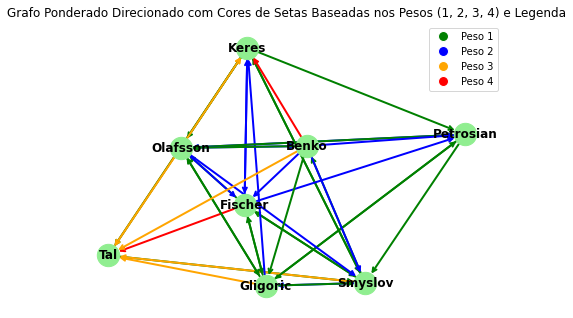

In [32]:
from matplotlib.lines import Line2D
pos = nx.spring_layout(G, seed=42)

# Obtendo os pesos das arestas
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Mapeamento de cores para os diferentes valores de peso (1, 2, 3, 4)
color_map = {1: 'green', 2: 'blue', 3: 'orange', 4: 'red'}

# Lista de cores para as arestas
edge_colors = [color_map[weight] for weight in weights]

# Plot do grafo
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_weight='bold',
        arrows=True, width=2, edge_color=edge_colors, arrowstyle='->')

# Criação da legenda manual
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Peso 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Peso 2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Peso 3'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Peso 4')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.title("Grafo Ponderado Direcionado com Cores de Setas Baseadas nos Pesos (1, 2, 3, 4) e Legenda")
plt.show()

Agora que temos o grafo, podemos calcular o Pagerank dele:

Convergiu em 9 iterações.


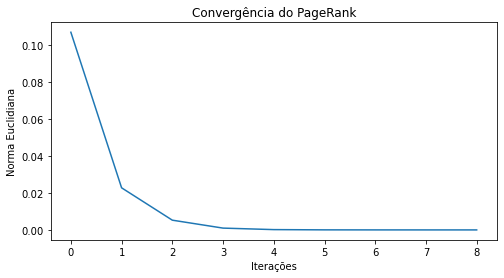

PageRank:


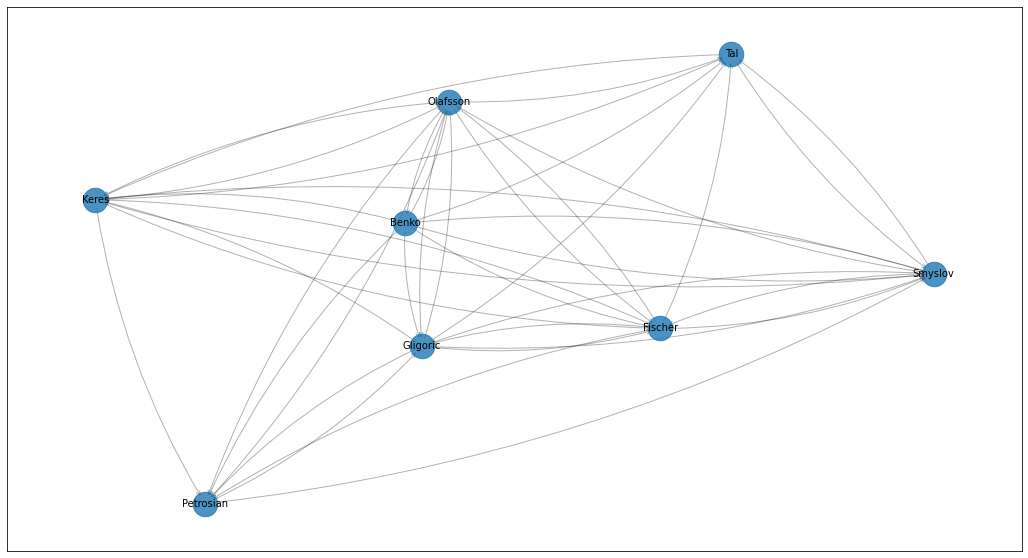

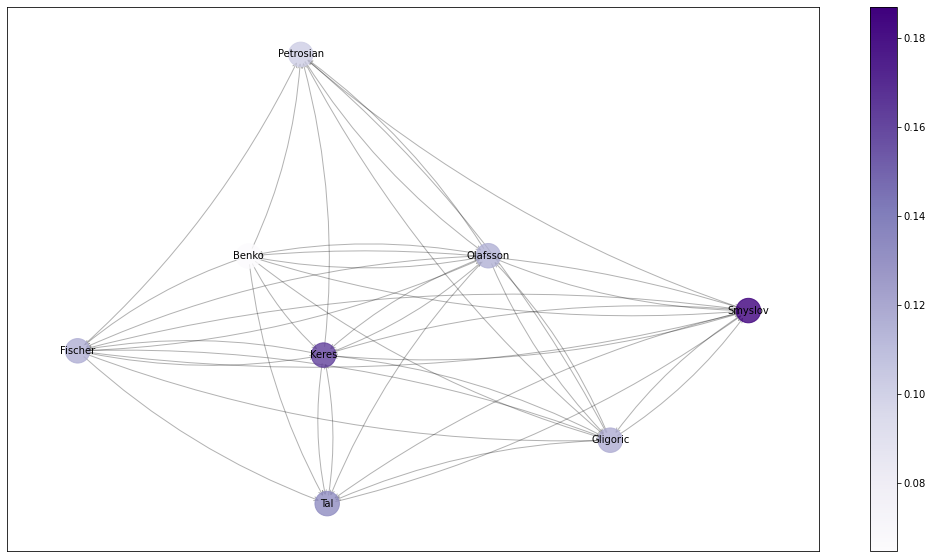

Nodes sorted by PageRank:
Smyslov: 0.18703981717846518
Keres: 0.1624414935365761
Tal: 0.13337297822374625
Gligoric: 0.11784347164024231
Fischer: 0.11682302474759518
Olafsson: 0.11624122368502357
Petrosian: 0.10157623474995114
Benko: 0.06466175623840065


In [33]:
# Calculate the PageRank
pagerank, G= run(G, 0.85, 1000)

# Sort the nodes by PageRank
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes by PageRank
print("Nodes sorted by PageRank:")
for node, rank in sorted_nodes_pr:
    print(f"{node}: {rank}")


Se compararmos essa ordem e a classificação final do torneio:

In [34]:
max_length_pr = max(len(str(pr[0])) for pr in sorted_nodes_pr)
# Encontrar o comprimento máximo dos nomes dos nós para alinhar corretamente
max_length_node = max(len(nome) for nome in nomes_nos)
print("Pagerank    Classificação")
print("---------   -------------")
# Imprimir as duas listas alinhadas à esquerda
for node_pr, node_name in zip(sorted_nodes_pr, nomes_nos):
    # Formatando as colunas com espaços para alinhamento à esquerda
    print(f"{str(node_pr[0]):<{max_length_pr}}   {node_name:<{max_length_node}}")


Pagerank    Classificação
---------   -------------
Smyslov     Tal      
Keres       Keres    
Tal         Petrosian
Gligoric    Smyslov  
Fischer     Fischer  
Olafsson    Gligoric 
Petrosian   Olafsson 
Benko       Benko    


Nesse caso a ordem retornada pelo Pagerank foi consideravelmente diferente da classificação final do torneio, o jogador Tal que foi o campeão do torneio, desce pra terceiro, o fato dele ter caído tanto ao comparar o page rank se deve ao fato de que grande parte dos seus pontos foram contra os jogadores que ficaram na parte de baixo da tabela, essas vir tórias foram cruciais para deixá-lo com mais pontos que os outros jogadores e vencer o torneio, mas a métrica do page rank não se interessa na quantidade de vitórias e sim se atenta a esse aspecto qualitativo, dando mais importância a uma vitória contra um jogador que foi bem do que contra um que foi mal no torneio. O mesmo fenômeno acontece com o jogador Petrosian que terminou em terceiro, mas ele obteve poucas vitórias contra os jogadores que foram bem, ao olhar sua classificação pelo Pagerank ele cai para penúltimo.

# 3

Por fim utilizaremos uma base de dados que armazena informações sobre milhares de heróis dos quadrinhos marvel, informações pessoais dos heróis, edições em que eles apreceram, e temos uma lista de todos os pares de herois que já apareceram juntos em alguma edição, essa lista pode ser vista como uma lista de arestas e a partir dela podemos montar uma rede cujos nós são todos os heróis e as arestas mostram que esses dois heróis já apareceram juntos em alguma história.

In [35]:
adjacency_list = pd.read_csv('archive/hero-network.csv')
adjacency_list

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [42]:
#construindo o grafo
for index, row in adjacency_list.iterrows():
    source = row['hero1']
    target = row['hero2']
    # Adiciona a aresta com seu peso (se aplicável)
    G.add_edge(source, target)

In [43]:
# Calculate the PageRank
pagerank = nx.pagerank(G)#esse grafo estava muito grande pra função que a gente implementou, então utilziamos a do netowrkx que é mais otimizada

# Sort the nodes by PageRank
sorted_nodes_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes by PageRank
print("Nodes sorted by PageRank:")
for node, rank in sorted_nodes_pr:
    print(f"{node}: {rank}")


Nodes sorted by PageRank:
SPIDER-MAN/PETER PAR: 0.005839697132981743
CAPTAIN AMERICA: 0.0054611934106126685
IRON MAN/TONY STARK : 0.004403935938962159
WOLVERINE/LOGAN : 0.004034836314467546
MR. FANTASTIC/REED R: 0.003917134706465909
HUMAN TORCH/JOHNNY S: 0.0038615286476041018
THING/BENJAMIN J. GR: 0.003829570574849808
THOR/DR. DONALD BLAK: 0.0034982011551662933
INVISIBLE WOMAN/SUE : 0.0034177431768517763
SCARLET WITCH/WANDA : 0.003269852008308329
BEAST/HENRY &HANK& P: 0.003267677828765528
DAREDEVIL/MATT MURDO: 0.0031691487118830687
HAWK: 0.0031202276450652652
VISION : 0.0031024400423729837
DR. STRANGE/STEPHEN : 0.003081252881660351
HULK/DR. ROBERT BRUC: 0.002963677759744382
ANGEL/WARREN KENNETH: 0.0029326526348009774
STORM/ORORO MUNROE S: 0.0029143189104940356
SUB-MARINER/NAMOR MA: 0.002826042036168604
PROFESSOR X/CHARLES : 0.0027956475979433325
SHE-HULK/JENNIFER WA: 0.002751334269880532
CYCLOPS/SCOTT SUMMER: 0.0027372978580439385
WASP/JANET VAN DYNE : 0.00272381446119179
WATSON-PARKER

Chegamos nessa ordenação dos heróis pelo Pagerank, podemos usar o resto da base de dados, e olhar pra quantidade absoluta de edições que cada herói apareceu:

In [44]:
edges = pd.read_csv('archive/edges.csv') #csv com duas colunas, uma o nome do heroi e na outra uma edição em que ele aparece

In [45]:
comics_per_hero = edges['hero'].value_counts()

# Exibindo o número de quadrinhos por herói
print(comics_per_hero)

SPIDER-MAN/PETER PARKER    1577
CAPTAIN AMERICA            1334
IRON MAN/TONY STARK        1150
THING/BENJAMIN J. GR        963
THOR/DR. DONALD BLAK        956
                           ... 
PROGENITOR                    1
DOMANI, DINO                  1
DOGGEREL                      1
DOCTOR, DR. JOSHUA            1
24-HOUR MAN/EMMANUEL          1
Name: hero, Length: 6439, dtype: int64


In [46]:
comics_per_hero.head(11).index


Index(['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK',
       'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S',
       'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN',
       'INVISIBLE WOMAN/SUE', 'SCARLET WITCH/WANDA'],
      dtype='object')

Pegando os 10 primeiros de ambas as listas para comparar:

In [47]:
# Get the first 10 heroes from the sorted nodes by PageRank
top_10_heroes_pr = [node for node, rank in sorted_nodes_pr[:10]]
top_10_heroes_ne = comics_per_hero.head(10).index
# Print the first 10 heroes
print("por Pagerank              por Número de Quadrinhos")
print("-------------             -----------------------")
lista1 = top_10_heroes_pr
lista2 = top_10_heroes_ne
max_length1 = max(len(item) for item in lista1)
max_length2 = max(len(item) for item in lista2)

# Iterando sobre as listas e imprimindo os elementos alinhados
for item1, item2 in zip(lista1, lista2):
    print(f"{item1.ljust(max_length1)}      {item2.ljust(max_length2)}")

por Pagerank              por Número de Quadrinhos
-------------             -----------------------
SPIDER-MAN/PETER PAR      SPIDER-MAN/PETER PARKER
CAPTAIN AMERICA           CAPTAIN AMERICA        
IRON MAN/TONY STARK       IRON MAN/TONY STARK    
WOLVERINE/LOGAN           THING/BENJAMIN J. GR   
MR. FANTASTIC/REED R      THOR/DR. DONALD BLAK   
HUMAN TORCH/JOHNNY S      HUMAN TORCH/JOHNNY S   
THING/BENJAMIN J. GR      MR. FANTASTIC/REED R   
THOR/DR. DONALD BLAK      HULK/DR. ROBERT BRUC   
INVISIBLE WOMAN/SUE       WOLVERINE/LOGAN        
SCARLET WITCH/WANDA       INVISIBLE WOMAN/SUE    


Aqui vemos uma mistura dos casos anterioes, os 3 primeiros colocados são os mesmo olhando tanto pro Pagerank quanto pro número de edições que o heroi apareceu, porém o Wolverine apesar de aparecer em menos edições que o Coisa,que o Thor e etc, acaba ficando acima deles no critério do Pagerank o que mostra que as interações dele acabam compensando essa diferença na quantidade de edições. Outro caso interessante é o da Feiticeira Ecarlate que não aparece no top 10 no quesito número de quadrinhos, mas ela sobe pra 8 ao ordenar pelo Pagerank.